In [ ]:
       N3IC - NSDI 2022

  File:     iot_dataset.ipynb
  Authors:  Roberto Bifulco (Roberto.Bifulco@neclab.eu)
            Giuseppe Siracusano (Giuseppe.Siracusano@neclab.eu)
            Davide Sanvito (Davide.Sanvito@neclab.eu)

NEC Laboratories Europe GmbH, Copyright (c) 2022, All rights reserved.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.

       PROPRIETARY INFORMATION ---

SOFTWARE LICENSE AGREEMENT

ACADEMIC OR NON-PROFIT ORGANIZATION NONCOMMERCIAL RESEARCH USE ONLY

BY USING OR DOWNLOADING THE SOFTWARE, YOU ARE AGREEING TO THE TERMS OF THIS
LICENSE AGREEMENT.  IF YOU DO NOT AGREE WITH THESE TERMS, YOU MAY NOT USE OR
DOWNLOAD THE SOFTWARE.

This is a license agreement ("Agreement") between your academic institution
or non-profit organization or self (called "Licensee" or "You" in this
Agreement) and NEC Laboratories Europe GmbH (called "Licensor" in this
Agreement).  All rights not specifically granted to you in this Agreement
are reserved for Licensor.

RESERVATION OF OWNERSHIP AND GRANT OF LICENSE: Licensor retains exclusive
ownership of any copy of the Software (as defined below) licensed under this
Agreement and hereby grants to Licensee a personal, non-exclusive,
non-transferable license to use the Software for noncommercial research
purposes, without the right to sublicense, pursuant to the terms and
conditions of this Agreement. NO EXPRESS OR IMPLIED LICENSES TO ANY OF
LICENSOR'S PATENT RIGHTS ARE GRANTED BY THIS LICENSE. As used in this
Agreement, the term "Software" means (i) the actual copy of all or any
portion of code for program routines made accessible to Licensee by Licensor
pursuant to this Agreement, inclusive of backups, updates, and/or merged
copies permitted hereunder or subsequently supplied by Licensor,  including
all or any file structures, programming instructions, user interfaces and
screen formats and sequences as well as any and all documentation and
instructions related to it, and (ii) all or any derivatives and/or
modifications created or made by You to any of the items specified in (i).

CONFIDENTIALITY/PUBLICATIONS: Licensee acknowledges that the Software is
proprietary to Licensor, and as such, Licensee agrees to receive all such
materials and to use the Software only in accordance with the terms of this
Agreement.  Licensee agrees to use reasonable effort to protect the Software
from unauthorized use, reproduction, distribution, or publication. All
publication materials mentioning features or use of this software must
explicitly include an acknowledgement the software was developed by NEC
Laboratories Europe GmbH.

COPYRIGHT: The Software is owned by Licensor.

PERMITTED USES:  The Software may be used for your own noncommercial
internal research purposes. You understand and agree that Licensor is not
obligated to implement any suggestions and/or feedback you might provide
regarding the Software, but to the extent Licensor does so, you are not
entitled to any compensation related thereto.

DERIVATIVES: You may create derivatives of or make modifications to the
Software, however, You agree that all and any such derivatives and
modifications will be owned by Licensor and become a part of the Software
licensed to You under this Agreement.  You may only use such derivatives and
modifications for your own noncommercial internal research purposes, and you
may not otherwise use, distribute or copy such derivatives and modifications
in violation of this Agreement.

BACKUPS:  If Licensee is an organization, it may make that number of copies
of the Software necessary for internal noncommercial use at a single site
within its organization provided that all information appearing in or on the
original labels, including the copyright and trademark notices are copied
onto the labels of the copies.

USES NOT PERMITTED:  You may not distribute, copy or use the Software except
as explicitly permitted herein. Licensee has not been granted any trademark
license as part of this Agreement.  Neither the name of NEC Laboratories
Europe GmbH nor the names of its contributors may be used to endorse or
promote products derived from this Software without specific prior written
permission.

You may not sell, rent, lease, sublicense, lend, time-share or transfer, in
whole or in part, or provide third parties access to prior or present
versions (or any parts thereof) of the Software.

ASSIGNMENT: You may not assign this Agreement or your rights hereunder
without the prior written consent of Licensor. Any attempted assignment
without such consent shall be null and void.

TERM: The term of the license granted by this Agreement is from Licensee's
acceptance of this Agreement by downloading the Software or by using the
Software until terminated as provided below.

The Agreement automatically terminates without notice if you fail to comply
with any provision of this Agreement.  Licensee may terminate this Agreement
by ceasing using the Software.  Upon any termination of this Agreement,
Licensee will delete any and all copies of the Software. You agree that all
provisions which operate to protect the proprietary rights of Licensor shall
remain in force should breach occur and that the obligation of
confidentiality described in this Agreement is binding in perpetuity and, as
such, survives the term of the Agreement.

FEE: Provided Licensee abides completely by the terms and conditions of this
Agreement, there is no fee due to Licensor for Licensee's use of the
Software in accordance with this Agreement.

DISCLAIMER OF WARRANTIES:  THE SOFTWARE IS PROVIDED "AS-IS" WITHOUT WARRANTY
OF ANY KIND INCLUDING ANY WARRANTIES OF PERFORMANCE OR MERCHANTABILITY OR
FITNESS FOR A PARTICULAR USE OR PURPOSE OR OF NON- INFRINGEMENT.  LICENSEE
BEARS ALL RISK RELATING TO QUALITY AND PERFORMANCE OF THE SOFTWARE AND
RELATED MATERIALS.

SUPPORT AND MAINTENANCE: No Software support or training by the Licensor is
provided as part of this Agreement.

EXCLUSIVE REMEDY AND LIMITATION OF LIABILITY: To the maximum extent
permitted under applicable law, Licensor shall not be liable for direct,
indirect, special, incidental, or consequential damages or lost profits
related to Licensee's use of and/or inability to use the Software, even if
Licensor is advised of the possibility of such damage.

EXPORT REGULATION: Licensee agrees to comply with any and all applicable
export control laws, regulations, and/or other laws related to embargoes and
sanction programs administered by law.

SEVERABILITY: If any provision(s) of this Agreement shall be held to be
invalid, illegal, or unenforceable by a court or other tribunal of competent
jurisdiction, the validity, legality and enforceability of the remaining
provisions shall not in any way be affected or impaired thereby.

NO IMPLIED WAIVERS: No failure or delay by Licensor in enforcing any right
or remedy under this Agreement shall be construed as a waiver of any future
or other exercise of such right or remedy by Licensor.

GOVERNING LAW: This Agreement shall be construed and enforced in accordance
with the laws of Germany without reference to conflict of laws principles.
You consent to the personal jurisdiction of the courts of this country and
waive their rights to venue outside of Germany.

ENTIRE AGREEMENT AND AMENDMENTS: This Agreement constitutes the sole and
entire agreement between Licensee and Licensor as to the matter set forth
herein and supersedes any previous agreements, understandings, and
arrangements between the parties relating hereto.

       THIS HEADER MAY NOT BE EXTRACTED OR MODIFIED IN ANY WAY.

In [21]:
from __future__ import print_function

import larq as lq
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import tensorflow as tf

np.random.seed(1337)

### Dataset

In [2]:
train_df = pd.read_csv('datasets/UNSW_NB15/UNSW_NB15_training-set.csv', delimiter=',')
test_df = pd.read_csv('datasets/UNSW_NB15/UNSW_NB15_testing-set.csv', delimiter=',')

In [3]:
data_df = pd.concat([train_df,test_df])

In [4]:
data_df = data_df.drop(['id'], axis=1)
cols = ['proto', 'service', 'state']
for col in cols:
    data_df[col] =  data_df[col].astype('category')
    data_df[col] =  data_df[col].cat.codes

### Feature selection

In [5]:
selected_columns = [
    'dur',
    'proto',
    'sbytes', 'dbytes',
    'sttl', 'dttl',
    'sload', 'dload',
    'spkts', 'dpkts',
    'smean', 'dmean',
    'sinpkt', 'dinpkt',
    'tcprtt', 'synack', 'ackdat',
    'ct_src_ltm', 'ct_dst_ltm',
    'ct_dst_src_ltm',
    'attack_cat'
]

In [6]:
data_df = data_df[selected_columns]
X = data_df[data_df.columns[:20]].values
Y = data_df[data_df.columns[20]].values

### Data binarization

In [7]:
Xint = X.astype("int")

In [8]:
size_in_bits = {
    'dur': 8,
    'proto': 8,
    'sbytes': 16, 'dbytes': 16,
    'sttl': 8, 'dttl': 8,
    'sload': 24, 'dload': 24,
    'spkts': 16, 'dpkts': 16,
    'smean': 16, 'dmean': 16,
    'sinpkt': 16, 'dinpkt': 16,
    'tcprtt': 8, 'synack': 8, 'ackdat': 8,
    'ct_src_ltm': 8, 'ct_dst_ltm': 8,
    'ct_dst_src_ltm': 8,
}

sum(size_in_bits.values())

256

In [9]:
Xbin = np.zeros( (Xint.shape[0], sum(size_in_bits.values())) )
for i, feature_row in enumerate(Xint):
    # the index at which the next binary value should be written
    write_ptr = 0
    for j, column_val in enumerate(feature_row):
        # Transforming in KB sbytes, dbytes, sload, dload
        if j in [2,3,6,7]:
            column_val = int(column_val/1000) 
        # Setting to maximum any value above the max given the number of b
        if (column_val > 2**size_in_bits[selected_columns[j]] - 1):
            column_val = 2**size_in_bits[selected_columns[j]] - 1
        tmp = list(bin(column_val)[2:])
        tmp = [int(x) for x in tmp]
        # zero padding to the left
        tmp = [0]*(size_in_bits[selected_columns[j]] - len(tmp)) + tmp
        for k, bin_val in enumerate(tmp):
            Xbin[i,write_ptr] = bin_val
            write_ptr += 1

In [10]:
# DT/RF dataset
Y__2_classes = Y.copy()
Y__2_classes[Y == 'Normal'] = 0
Y__2_classes[Y != 'Normal'] = 1
Y__2_classes = Y__2_classes.astype('int')

# BNN dataset
Xbin[Xbin == 0] = -1
X_bin = Xbin

Y_cat__2_classes = np_utils.to_categorical(Y__2_classes)

In [11]:
def plot_confusion_matrix_wo_clf(y_true, y_pred, class_names, normalize='true'):
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    if normalize == 'true':
        disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='.2f', colorbar=False)
    else:
        disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    
    plt.show()

In [12]:
def metrics_binary_dataset(clf, X_test, y_test, y_pred, y_score, is_bnn=False):
    
    if is_bnn:
        # Make y_test 1D
        y_test = np.argmax(y_test, axis=1)
        
    plot_confusion_matrix_wo_clf(y_test, y_pred, ['0','1'])
   
    a = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    tpr = r
    fpr = fp / (fp+tn)
    fnr = fn / (fn+tp)
    tnr = tn / (tn+fp)
    
    y_score = to_categorical(y_pred)
    fpr_, tpr_, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr_, tpr_)

    return a, p, r, tpr, fpr, fnr, f1, roc_auc

In [13]:
def build_bnn_model(neurons, 
                    input_shape, 
                    last_act="softmax", 
                    learning_rate=0.0001, 
                    loss='squared_hinge'):
    
    kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")

    model = tf.keras.models.Sequential()
    model.add(lq.layers.QuantDense(neurons[0], use_bias=False,
                                   input_quantizer="ste_sign",
                                   kernel_quantizer="ste_sign",
                                   kernel_constraint="weight_clip",
                                   input_shape=(input_shape,) ) )
    model.add(tf.keras.layers.BatchNormalization(scale=False, momentum=0.9))
    model.add(lq.layers.QuantDense(neurons[1], use_bias=False, **kwargs))
    model.add(tf.keras.layers.BatchNormalization(scale=False, momentum=0.9))
    model.add(lq.layers.QuantDense(neurons[2], use_bias=False, activation=last_act, **kwargs))

    # lq.models.summary(model)
    
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    
    return model

In [14]:
depths_range = [3, 6, 9]
estimators_range = [5]

bnn_models = [
    [32, 16, 2],
    [64, 32, 2],
    [128, 64, 2]
]

class_names = ['0','1']

In [15]:
batch_size = 256
num_folds = 5
train_epochs = 15

In [16]:
accuracy_store_sec = {}
precision_store_sec = {}
recall_store_sec = {}
tpr_store_sec = {}
fpr_store_sec = {}
fnr_store_sec = {}
f1_store_sec = {}
roc_auc_store_sec = {}

skf = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)

## Random Forest

RF: depth=3, estimators=5, fold_idx=0


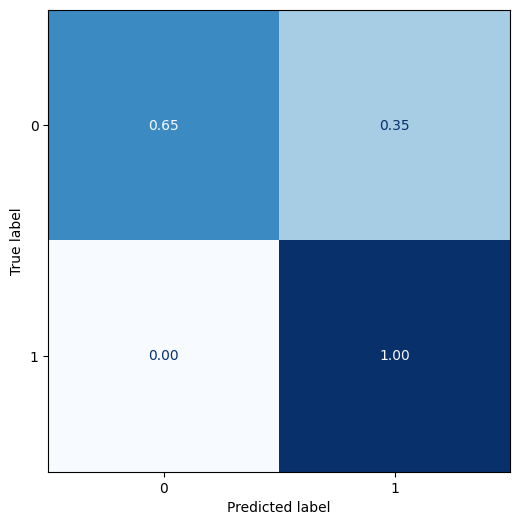

----------------------------------------
RF: depth=3, estimators=5, fold_idx=1


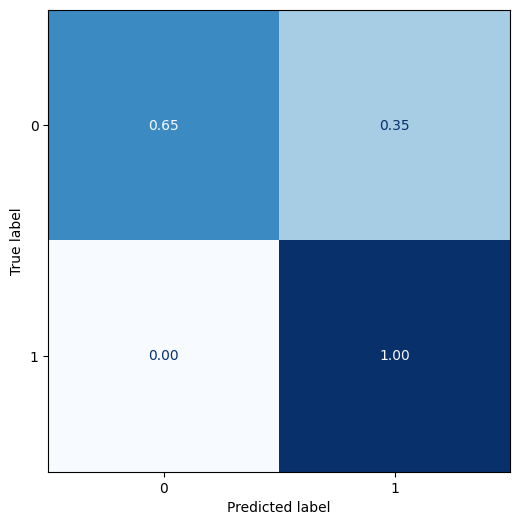

----------------------------------------
RF: depth=3, estimators=5, fold_idx=2


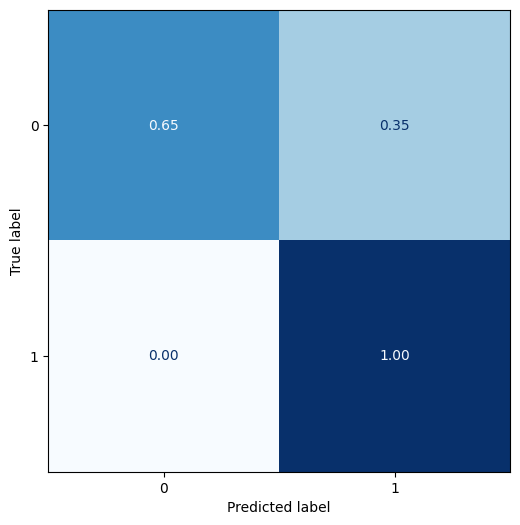

----------------------------------------
RF: depth=3, estimators=5, fold_idx=3


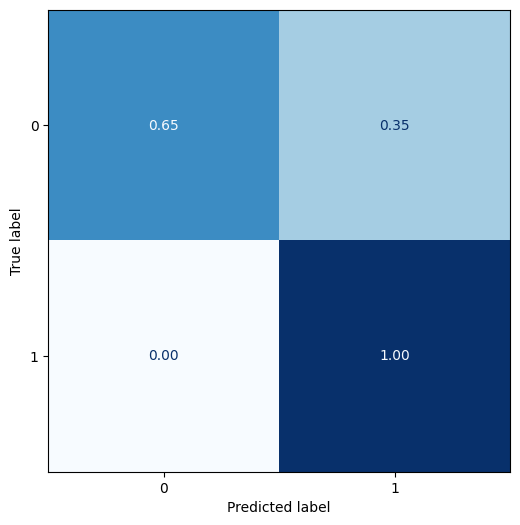

----------------------------------------
RF: depth=3, estimators=5, fold_idx=4


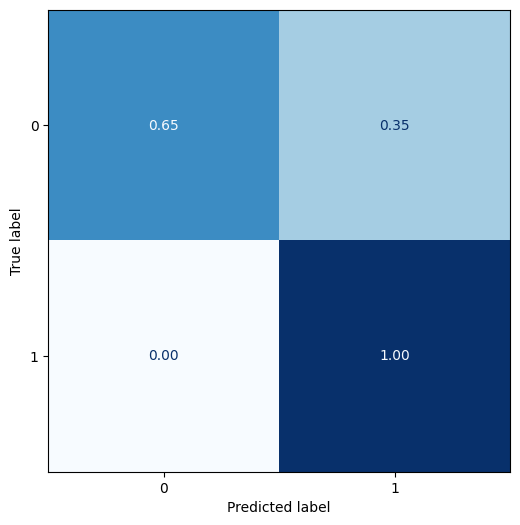

----------------------------------------
RF: depth=6, estimators=5, fold_idx=0


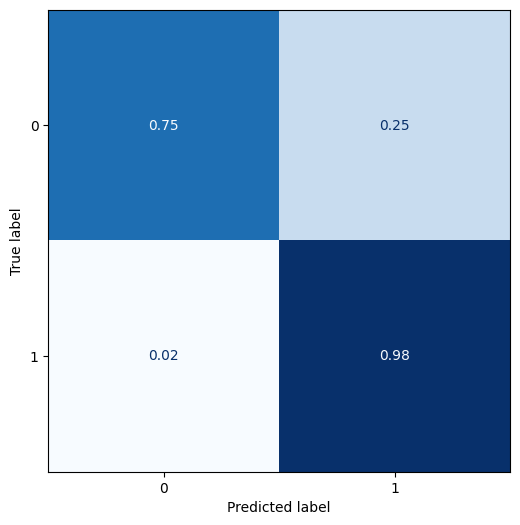

----------------------------------------
RF: depth=6, estimators=5, fold_idx=1


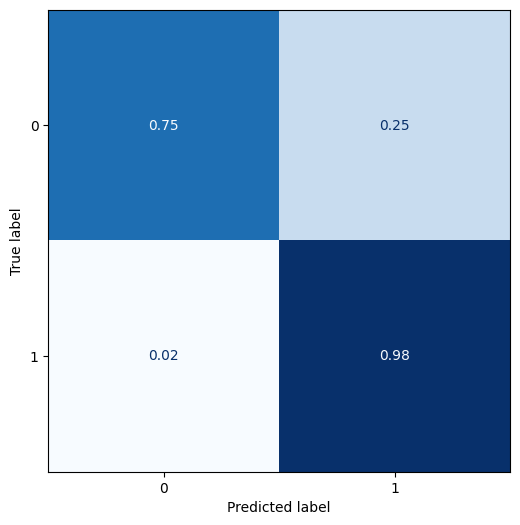

----------------------------------------
RF: depth=6, estimators=5, fold_idx=2


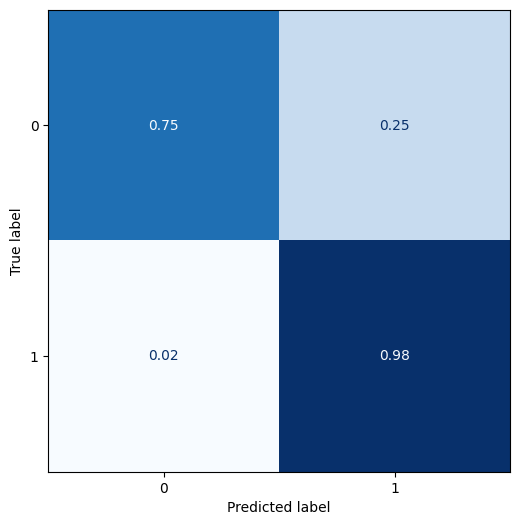

----------------------------------------
RF: depth=6, estimators=5, fold_idx=3


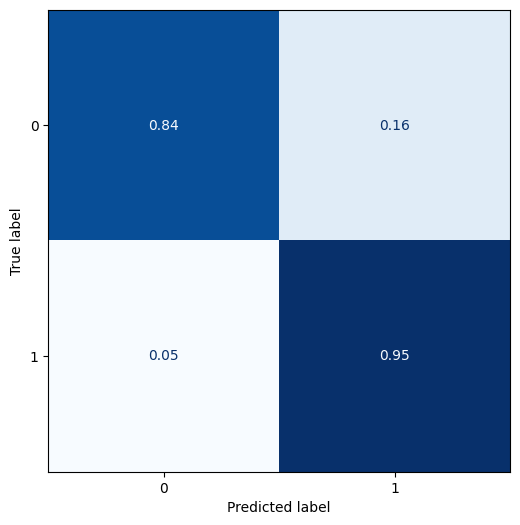

----------------------------------------
RF: depth=6, estimators=5, fold_idx=4


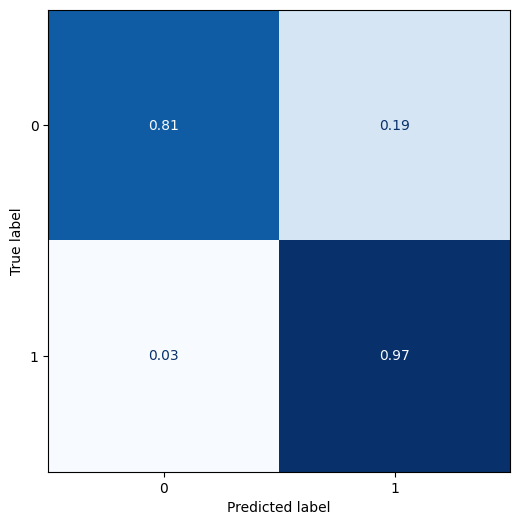

----------------------------------------
RF: depth=9, estimators=5, fold_idx=0


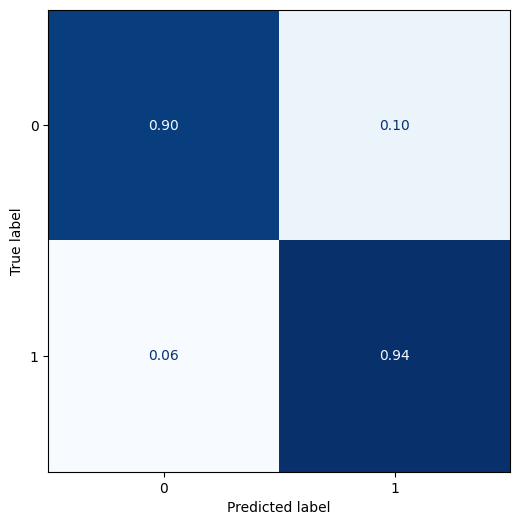

----------------------------------------
RF: depth=9, estimators=5, fold_idx=1


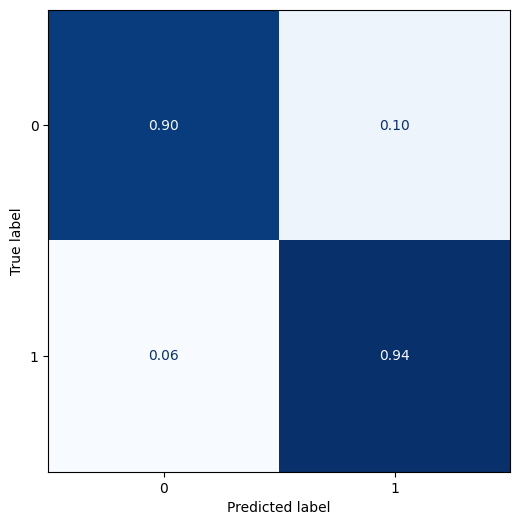

----------------------------------------
RF: depth=9, estimators=5, fold_idx=2


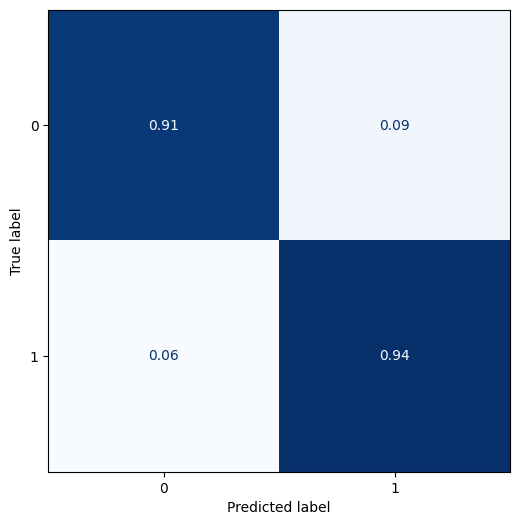

----------------------------------------
RF: depth=9, estimators=5, fold_idx=3


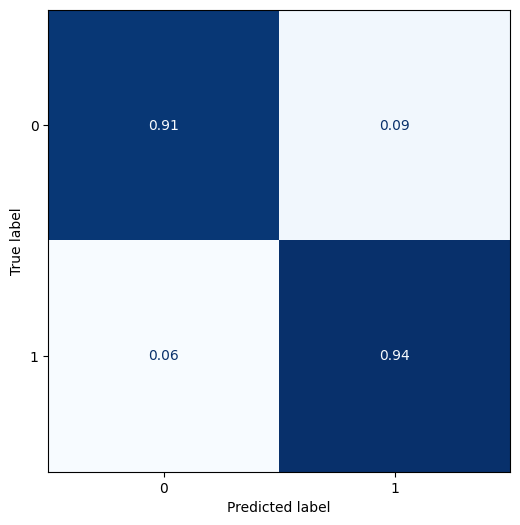

----------------------------------------
RF: depth=9, estimators=5, fold_idx=4


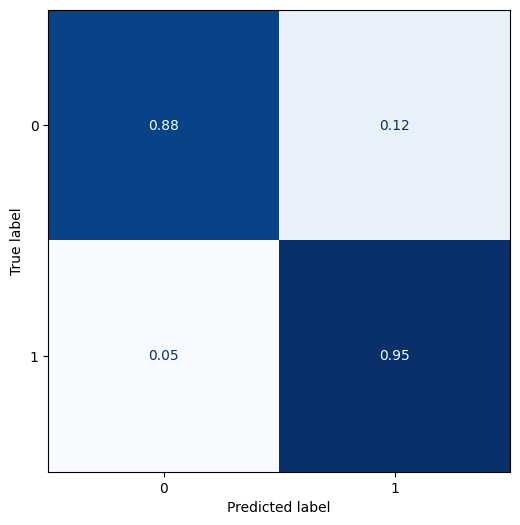

----------------------------------------


In [17]:
for depth in depths_range:
    for estimators in estimators_range:
        label = 'rf__depth_%d__estimators_%d' % (depth, estimators)
        accuracy_store_sec[label] = np.zeros(num_folds)
        precision_store_sec[label] = np.zeros(num_folds)
        recall_store_sec[label] = np.zeros(num_folds)
        tpr_store_sec[label] = np.zeros(num_folds)
        fpr_store_sec[label] = np.zeros(num_folds)
        fnr_store_sec[label] = np.zeros(num_folds)
        f1_store_sec[label] = np.zeros(num_folds)
        roc_auc_store_sec[label] = np.zeros(num_folds)

        fold_idx = 0
        for train_index, test_index in skf.split(X, Y):
            print('RF: depth=%d, estimators=%d, fold_idx=%d' % (depth, estimators, fold_idx))
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y__2_classes[train_index], Y__2_classes[test_index]

            rf = RandomForestClassifier(criterion='entropy', max_depth=depth, n_estimators=estimators, random_state=0)
            rf = rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            y_score = rf.predict_proba(X_test)

            a, p, r, tpr, fpr, fnr, f1, roc_auc = metrics_binary_dataset(rf, X_test, y_test, y_pred, y_score)
            accuracy_store_sec[label][fold_idx] = a
            precision_store_sec[label][fold_idx] = p
            recall_store_sec[label][fold_idx] = r
            tpr_store_sec[label][fold_idx] = tpr
            fpr_store_sec[label][fold_idx] = fpr
            fnr_store_sec[label][fold_idx] = fnr
            f1_store_sec[label][fold_idx] = f1
            roc_auc_store_sec[label][fold_idx] = roc_auc
        
            fold_idx += 1

            print('-'*40)
            
        print('='*40)

    print('='*80)

## Decision Trees

DT: depth=3, fold_idx=0


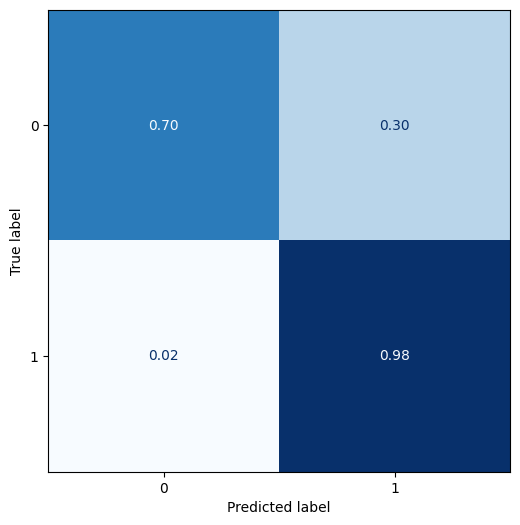

----------------------------------------
DT: depth=3, fold_idx=1


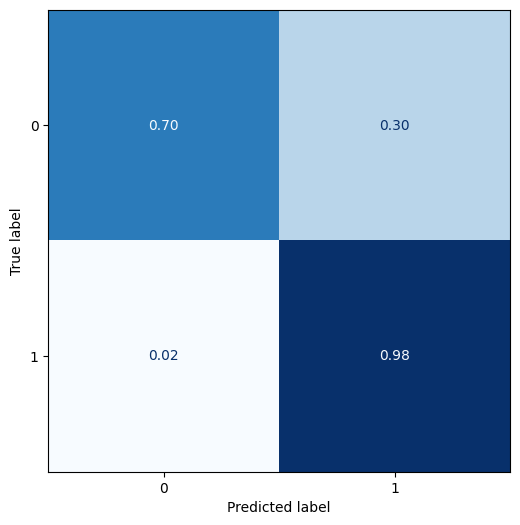

----------------------------------------
DT: depth=3, fold_idx=2


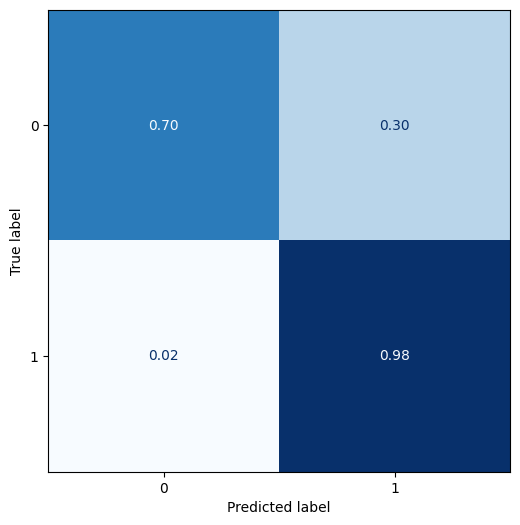

----------------------------------------
DT: depth=3, fold_idx=3


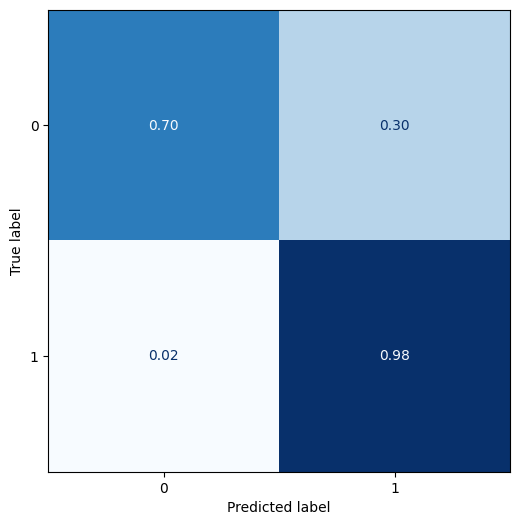

----------------------------------------
DT: depth=3, fold_idx=4


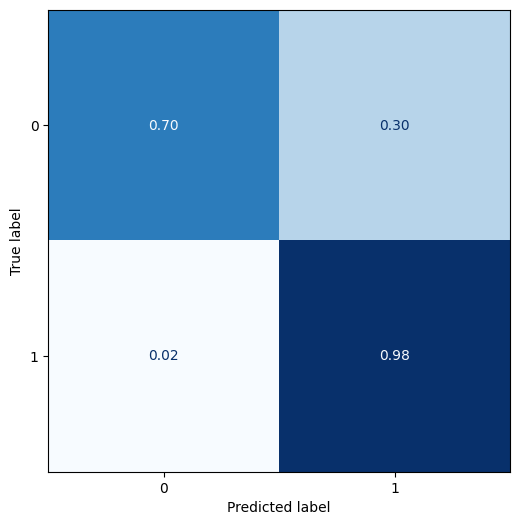

----------------------------------------
DT: depth=6, fold_idx=0


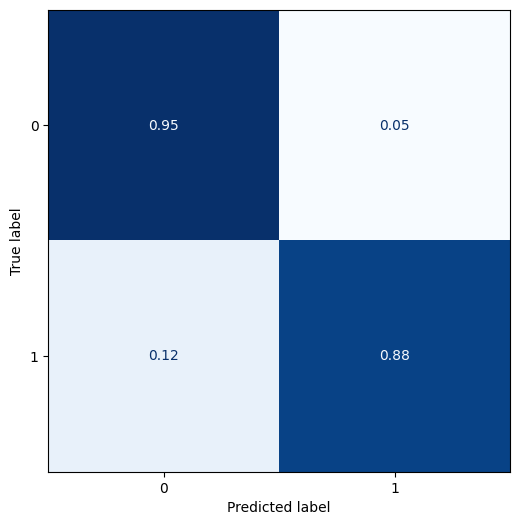

----------------------------------------
DT: depth=6, fold_idx=1


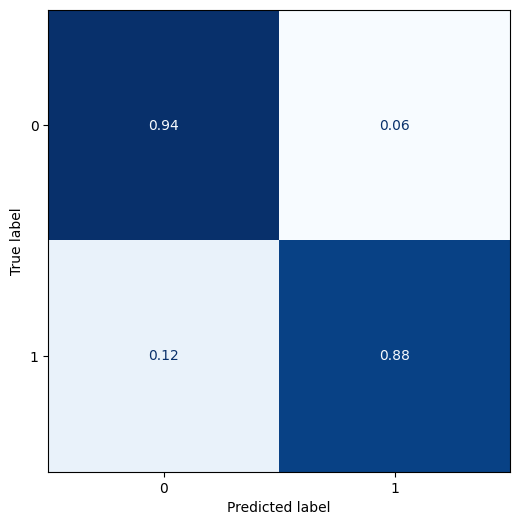

----------------------------------------
DT: depth=6, fold_idx=2


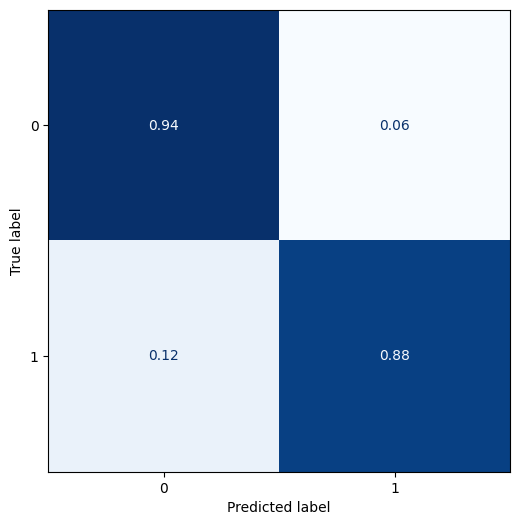

----------------------------------------
DT: depth=6, fold_idx=3


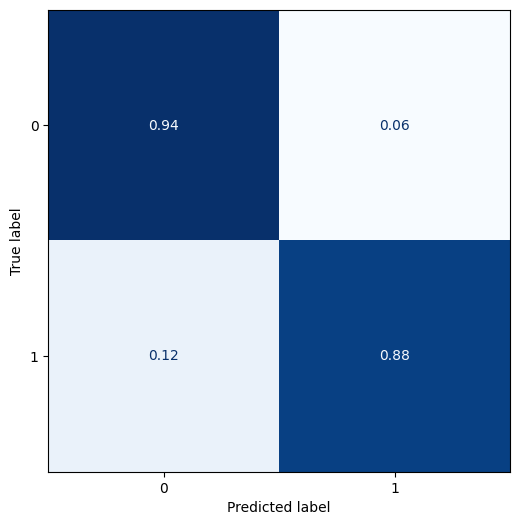

----------------------------------------
DT: depth=6, fold_idx=4


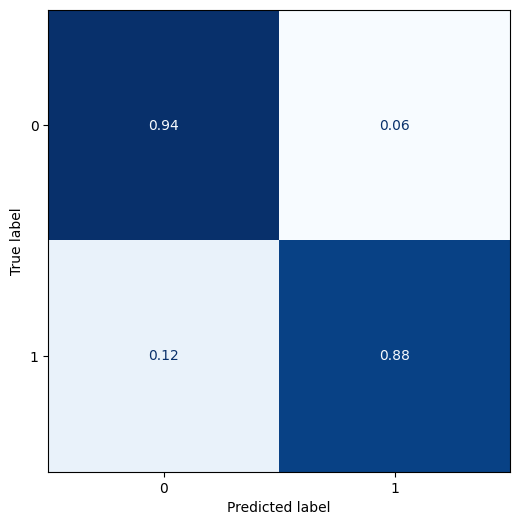

----------------------------------------
DT: depth=9, fold_idx=0


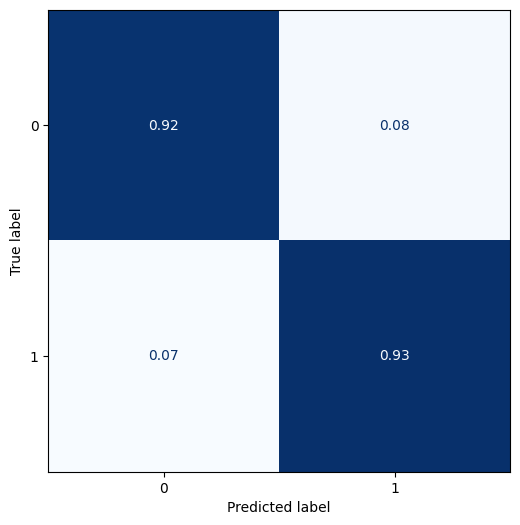

----------------------------------------
DT: depth=9, fold_idx=1


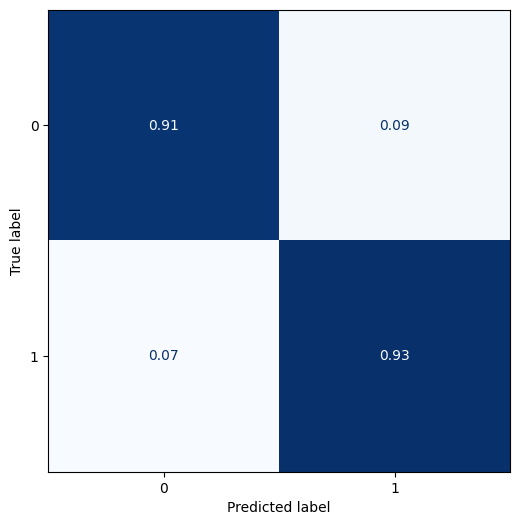

----------------------------------------
DT: depth=9, fold_idx=2


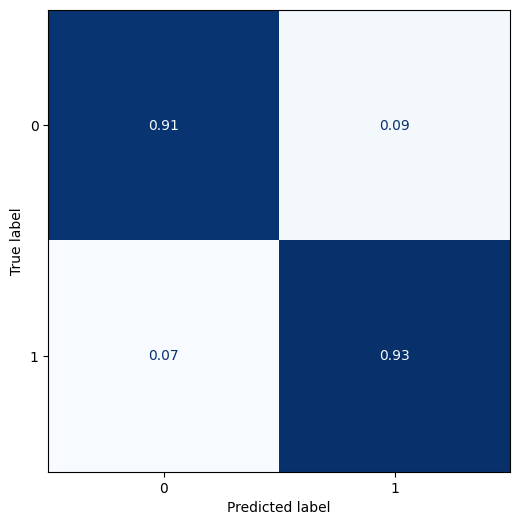

----------------------------------------
DT: depth=9, fold_idx=3


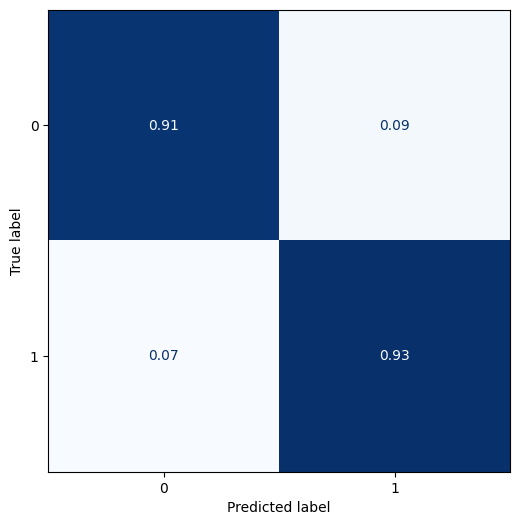

----------------------------------------
DT: depth=9, fold_idx=4


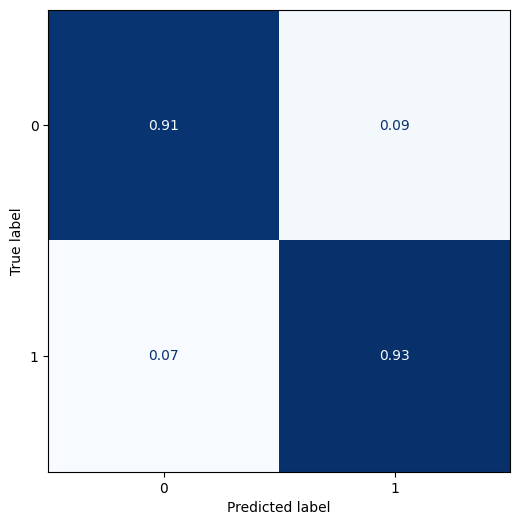

----------------------------------------


In [18]:
for depth in depths_range:    
    label = 'dt__depth_%d' % (depth)
    accuracy_store_sec[label] = np.zeros(num_folds)
    precision_store_sec[label] = np.zeros(num_folds)
    recall_store_sec[label] = np.zeros(num_folds)
    tpr_store_sec[label] = np.zeros(num_folds)
    fpr_store_sec[label] = np.zeros(num_folds)
    fnr_store_sec[label] = np.zeros(num_folds)
    f1_store_sec[label] = np.zeros(num_folds)
    roc_auc_store_sec[label] = np.zeros(num_folds)
    
    fold_idx = 0
    for train_index, test_index in skf.split(X, Y):
        print('DT: depth=%d, fold_idx=%d' % (depth, fold_idx))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y__2_classes[train_index], Y__2_classes[test_index]
                        
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
        dt = dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        y_score = dt.predict_proba(X_test)

        a, p, r, tpr, fpr, fnr, f1, roc_auc = metrics_binary_dataset(dt, X_test, y_test, y_pred, y_score)
        accuracy_store_sec[label][fold_idx] = a
        precision_store_sec[label][fold_idx] = p
        recall_store_sec[label][fold_idx] = r
        tpr_store_sec[label][fold_idx] = tpr
        fpr_store_sec[label][fold_idx] = fpr
        fnr_store_sec[label][fold_idx] = fnr
        f1_store_sec[label][fold_idx] = f1
        roc_auc_store_sec[label][fold_idx] = roc_auc

        fold_idx += 1

        print('-'*40)
    
    print('='*80)

## Binary NN

BNN [32, 16, 2] , fold_idx=0
Epoch 1/15
877/906 [============================>.] - ETA: 0s - loss: 0.9646 - accuracy: 0.7213
Epoch 1: val_accuracy improved from -inf to 0.77429, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold0
906/906 [==============================] - 2s 1ms/step - loss: 0.9602 - accuracy: 0.7239 - val_loss: 0.8565 - val_accuracy: 0.7743
Epoch 2/15
886/906 [============================>.] - ETA: 0s - loss: 0.7802 - accuracy: 0.8366
Epoch 2: val_accuracy improved from 0.77429 to 0.84690, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold0
906/906 [==============================] - 1s 1ms/step - loss: 0.7793 - accuracy: 0.8372 - val_loss: 0.7573 - val_accuracy: 0.8469
Epoch 3/15
906/906 [==============================] - ETA: 0s - loss: 0.7320 - accuracy: 0.8715
Epoch 3: val_accuracy improved from 0.84690 to 0.88579, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold0
906/906 [==============================] - 

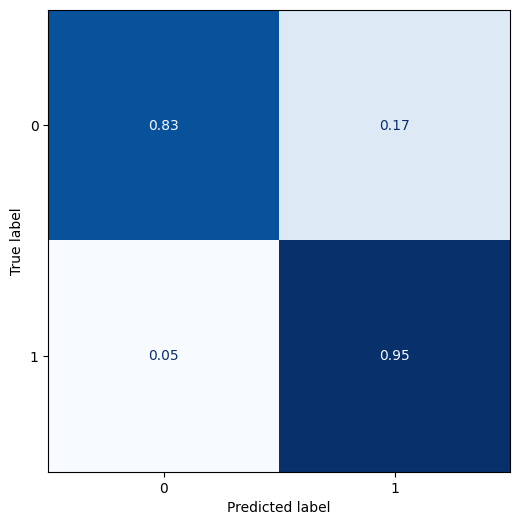

----------------------------------------
BNN [32, 16, 2] , fold_idx=1
Epoch 1/15
896/906 [============================>.] - ETA: 0s - loss: 0.9390 - accuracy: 0.7155
Epoch 1: val_accuracy improved from -inf to 0.84147, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold1
906/906 [==============================] - 2s 1ms/step - loss: 0.9376 - accuracy: 0.7166 - val_loss: 0.8108 - val_accuracy: 0.8415
Epoch 2/15
876/906 [============================>.] - ETA: 0s - loss: 0.7804 - accuracy: 0.8450
Epoch 2: val_accuracy improved from 0.84147 to 0.87799, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold1
906/906 [==============================] - 1s 1ms/step - loss: 0.7791 - accuracy: 0.8460 - val_loss: 0.7379 - val_accuracy: 0.8780
Epoch 3/15
892/906 [============================>.] - ETA: 0s - loss: 0.7322 - accuracy: 0.8785
Epoch 3: val_accuracy improved from 0.87799 to 0.89281, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold1
90

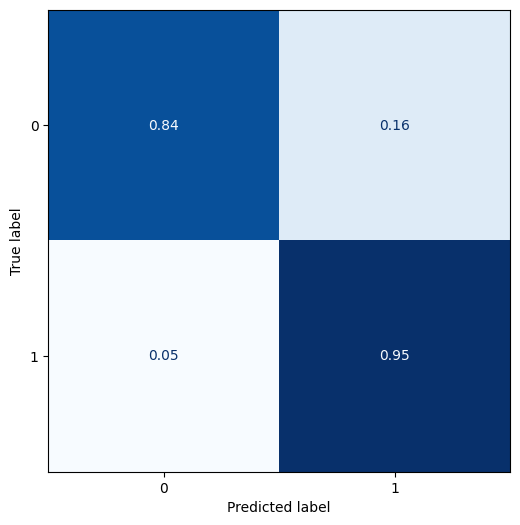

----------------------------------------
BNN [32, 16, 2] , fold_idx=2
Epoch 1/15
896/906 [============================>.] - ETA: 0s - loss: 0.9610 - accuracy: 0.7601
Epoch 1: val_accuracy improved from -inf to 0.82956, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold2
906/906 [==============================] - 2s 2ms/step - loss: 0.9597 - accuracy: 0.7607 - val_loss: 0.8285 - val_accuracy: 0.8296
Epoch 2/15
900/906 [============================>.] - ETA: 0s - loss: 0.7829 - accuracy: 0.8539
Epoch 2: val_accuracy improved from 0.82956 to 0.86677, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold2
906/906 [==============================] - 1s 1ms/step - loss: 0.7826 - accuracy: 0.8541 - val_loss: 0.7595 - val_accuracy: 0.8668
Epoch 3/15
890/906 [============================>.] - ETA: 0s - loss: 0.7251 - accuracy: 0.8847
Epoch 3: val_accuracy improved from 0.86677 to 0.89048, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold2
90

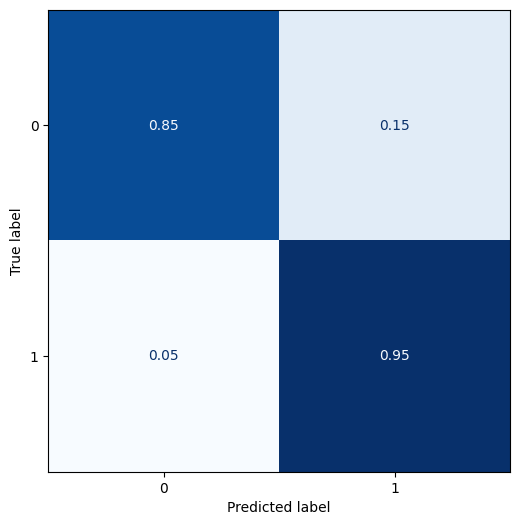

----------------------------------------
BNN [32, 16, 2] , fold_idx=3
Epoch 1/15
887/906 [============================>.] - ETA: 0s - loss: 0.9470 - accuracy: 0.7610
Epoch 1: val_accuracy improved from -inf to 0.81512, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold3
906/906 [==============================] - 2s 1ms/step - loss: 0.9445 - accuracy: 0.7625 - val_loss: 0.8577 - val_accuracy: 0.8151
Epoch 2/15
878/906 [============================>.] - ETA: 0s - loss: 0.7888 - accuracy: 0.8515
Epoch 2: val_accuracy improved from 0.81512 to 0.87419, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold3
906/906 [==============================] - 1s 1ms/step - loss: 0.7874 - accuracy: 0.8523 - val_loss: 0.7445 - val_accuracy: 0.8742
Epoch 3/15
889/906 [============================>.] - ETA: 0s - loss: 0.7299 - accuracy: 0.8777
Epoch 3: val_accuracy improved from 0.87419 to 0.89021, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold3
90

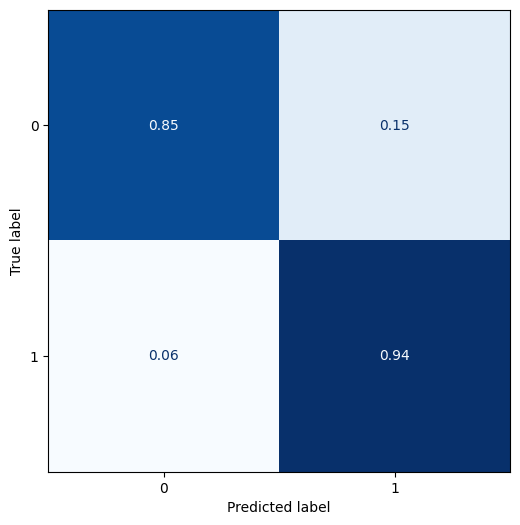

----------------------------------------
BNN [32, 16, 2] , fold_idx=4
Epoch 1/15
876/906 [============================>.] - ETA: 0s - loss: 1.0195 - accuracy: 0.7282
Epoch 1: val_accuracy improved from -inf to 0.81772, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold4
906/906 [==============================] - 2s 1ms/step - loss: 1.0139 - accuracy: 0.7312 - val_loss: 0.8515 - val_accuracy: 0.8177
Epoch 2/15
864/906 [===========================>..] - ETA: 0s - loss: 0.7832 - accuracy: 0.8495
Epoch 2: val_accuracy improved from 0.81772 to 0.87663, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold4
906/906 [==============================] - 1s 1ms/step - loss: 0.7816 - accuracy: 0.8501 - val_loss: 0.7394 - val_accuracy: 0.8766
Epoch 3/15
897/906 [============================>.] - ETA: 0s - loss: 0.7269 - accuracy: 0.8779
Epoch 3: val_accuracy improved from 0.87663 to 0.88633, saving model to models/bnn__sec_StratifiedShuffleSplit__32_16_2__fold4
90

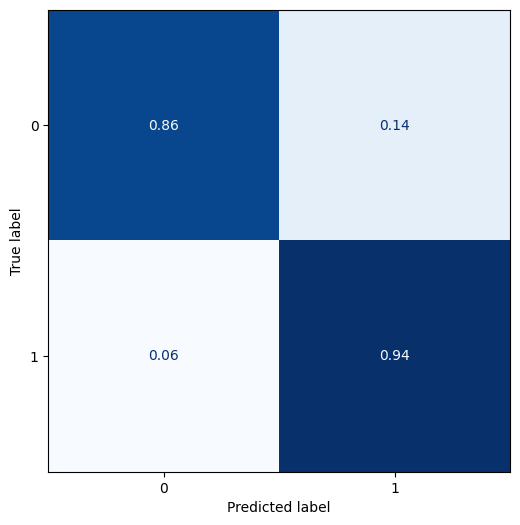

----------------------------------------
BNN [64, 32, 2] , fold_idx=0
Epoch 1/15
895/906 [============================>.] - ETA: 0s - loss: 0.9507 - accuracy: 0.7471
Epoch 1: val_accuracy improved from -inf to 0.85265, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold0
906/906 [==============================] - 2s 2ms/step - loss: 0.9489 - accuracy: 0.7483 - val_loss: 0.7883 - val_accuracy: 0.8526
Epoch 2/15
898/906 [============================>.] - ETA: 0s - loss: 0.7613 - accuracy: 0.8636
Epoch 2: val_accuracy improved from 0.85265 to 0.88439, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold0
906/906 [==============================] - 1s 2ms/step - loss: 0.7610 - accuracy: 0.8638 - val_loss: 0.7256 - val_accuracy: 0.8844
Epoch 3/15
905/906 [============================>.] - ETA: 0s - loss: 0.7182 - accuracy: 0.8868
Epoch 3: val_accuracy improved from 0.88439 to 0.89122, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold0
90

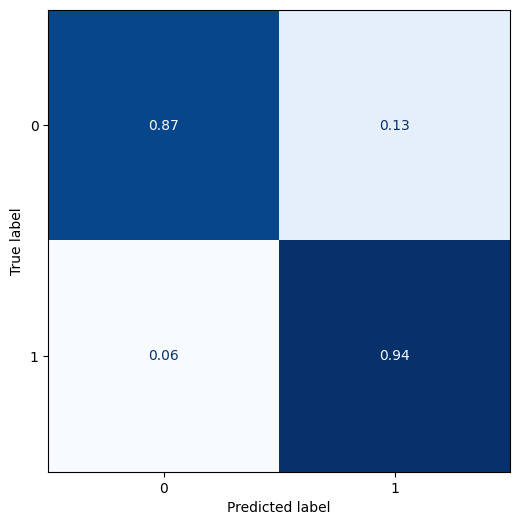

----------------------------------------
BNN [64, 32, 2] , fold_idx=1
Epoch 1/15
898/906 [============================>.] - ETA: 0s - loss: 0.9305 - accuracy: 0.7726
Epoch 1: val_accuracy improved from -inf to 0.85532, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold1
906/906 [==============================] - 2s 2ms/step - loss: 0.9291 - accuracy: 0.7734 - val_loss: 0.7809 - val_accuracy: 0.8553
Epoch 2/15
895/906 [============================>.] - ETA: 0s - loss: 0.7457 - accuracy: 0.8705
Epoch 2: val_accuracy improved from 0.85532 to 0.88598, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold1
906/906 [==============================] - 1s 1ms/step - loss: 0.7451 - accuracy: 0.8708 - val_loss: 0.7214 - val_accuracy: 0.8860
Epoch 3/15
877/906 [============================>.] - ETA: 0s - loss: 0.7075 - accuracy: 0.8917
Epoch 3: val_accuracy improved from 0.88598 to 0.89611, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold1
90

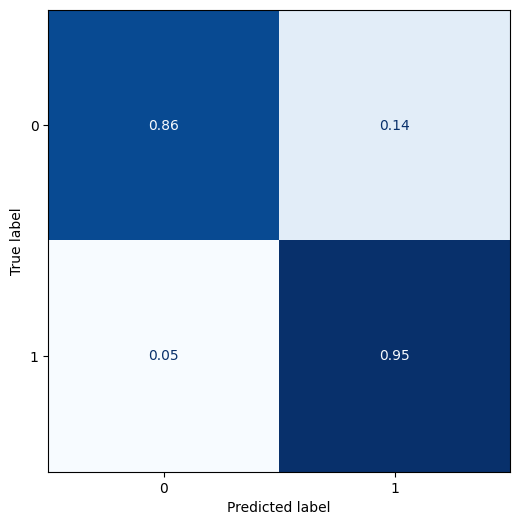

----------------------------------------
BNN [64, 32, 2] , fold_idx=2
Epoch 1/15
906/906 [==============================] - ETA: 0s - loss: 0.9530 - accuracy: 0.7646
Epoch 1: val_accuracy improved from -inf to 0.82979, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold2
906/906 [==============================] - 2s 2ms/step - loss: 0.9530 - accuracy: 0.7646 - val_loss: 0.8309 - val_accuracy: 0.8298
Epoch 2/15
886/906 [============================>.] - ETA: 0s - loss: 0.7520 - accuracy: 0.8709
Epoch 2: val_accuracy improved from 0.82979 to 0.88237, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold2
906/906 [==============================] - 1s 1ms/step - loss: 0.7514 - accuracy: 0.8713 - val_loss: 0.7296 - val_accuracy: 0.8824
Epoch 3/15
872/906 [===========================>..] - ETA: 0s - loss: 0.7133 - accuracy: 0.8902
Epoch 3: val_accuracy improved from 0.88237 to 0.89584, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold2
90

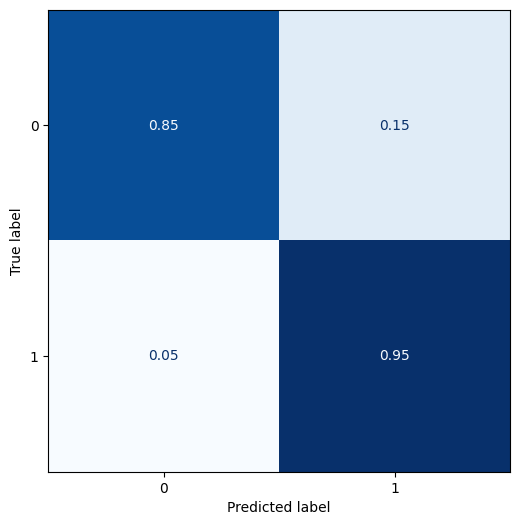

----------------------------------------
BNN [64, 32, 2] , fold_idx=3
Epoch 1/15
904/906 [============================>.] - ETA: 0s - loss: 0.9412 - accuracy: 0.7722
Epoch 1: val_accuracy improved from -inf to 0.83740, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold3
906/906 [==============================] - 2s 2ms/step - loss: 0.9409 - accuracy: 0.7723 - val_loss: 0.8169 - val_accuracy: 0.8374
Epoch 2/15
906/906 [==============================] - ETA: 0s - loss: 0.7543 - accuracy: 0.8676
Epoch 2: val_accuracy improved from 0.83740 to 0.88296, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold3
906/906 [==============================] - 1s 2ms/step - loss: 0.7543 - accuracy: 0.8676 - val_loss: 0.7280 - val_accuracy: 0.8830
Epoch 3/15
881/906 [============================>.] - ETA: 0s - loss: 0.7144 - accuracy: 0.8887
Epoch 3: val_accuracy improved from 0.88296 to 0.89483, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold3
90

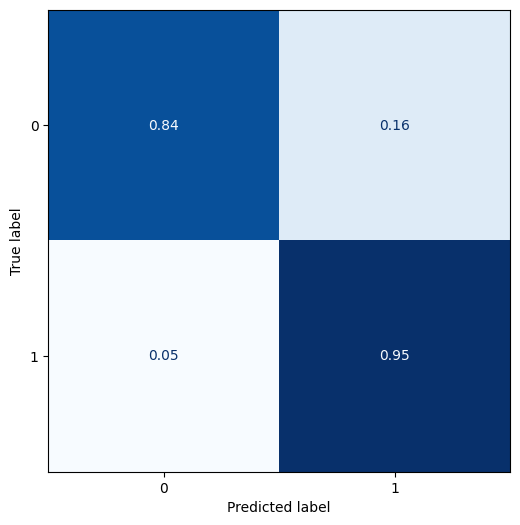

----------------------------------------
BNN [64, 32, 2] , fold_idx=4
Epoch 1/15
899/906 [============================>.] - ETA: 0s - loss: 0.9281 - accuracy: 0.7711
Epoch 1: val_accuracy improved from -inf to 0.84652, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold4
906/906 [==============================] - 2s 2ms/step - loss: 0.9271 - accuracy: 0.7717 - val_loss: 0.7990 - val_accuracy: 0.8465
Epoch 2/15
897/906 [============================>.] - ETA: 0s - loss: 0.7532 - accuracy: 0.8693
Epoch 2: val_accuracy improved from 0.84652 to 0.87911, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold4
906/906 [==============================] - 1s 1ms/step - loss: 0.7531 - accuracy: 0.8694 - val_loss: 0.7357 - val_accuracy: 0.8791
Epoch 3/15
896/906 [============================>.] - ETA: 0s - loss: 0.7163 - accuracy: 0.8879
Epoch 3: val_accuracy improved from 0.87911 to 0.89402, saving model to models/bnn__sec_StratifiedShuffleSplit__64_32_2__fold4
90

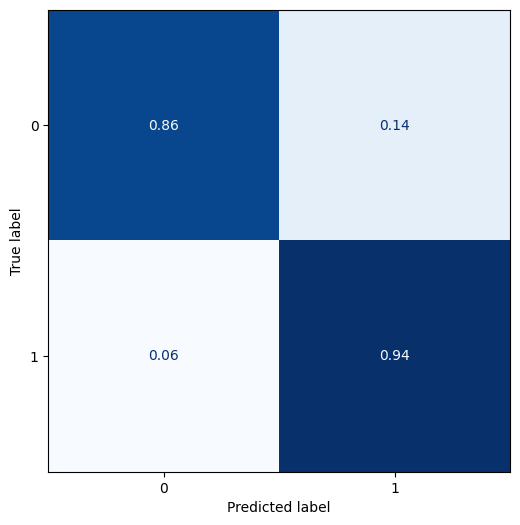

----------------------------------------
BNN [128, 64, 2] , fold_idx=0
Epoch 1/15
902/906 [============================>.] - ETA: 0s - loss: 0.8279 - accuracy: 0.8238
Epoch 1: val_accuracy improved from -inf to 0.87857, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold0
906/906 [==============================] - 2s 2ms/step - loss: 0.8276 - accuracy: 0.8240 - val_loss: 0.7387 - val_accuracy: 0.8786
Epoch 2/15
883/906 [============================>.] - ETA: 0s - loss: 0.7227 - accuracy: 0.8858
Epoch 2: val_accuracy improved from 0.87857 to 0.89751, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold0
906/906 [==============================] - 2s 2ms/step - loss: 0.7222 - accuracy: 0.8861 - val_loss: 0.7009 - val_accuracy: 0.8975
Epoch 3/15
880/906 [============================>.] - ETA: 0s - loss: 0.7009 - accuracy: 0.8971
Epoch 3: val_accuracy improved from 0.89751 to 0.90352, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold

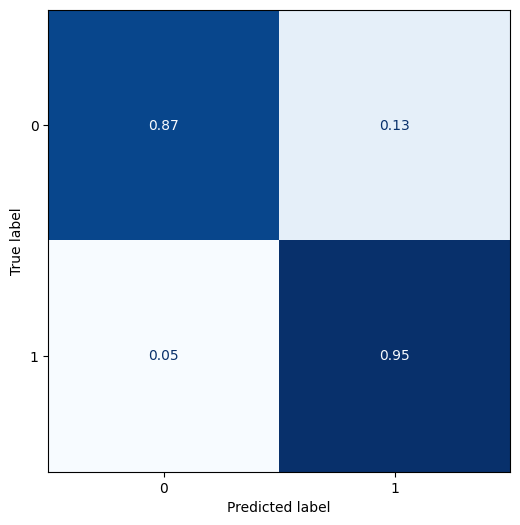

----------------------------------------
BNN [128, 64, 2] , fold_idx=1
Epoch 1/15
888/906 [============================>.] - ETA: 0s - loss: 0.8688 - accuracy: 0.8106
Epoch 1: val_accuracy improved from -inf to 0.87166, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold1
906/906 [==============================] - 3s 2ms/step - loss: 0.8665 - accuracy: 0.8116 - val_loss: 0.7420 - val_accuracy: 0.8717
Epoch 2/15
894/906 [============================>.] - ETA: 0s - loss: 0.7224 - accuracy: 0.8848
Epoch 2: val_accuracy improved from 0.87166 to 0.89945, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold1
906/906 [==============================] - 2s 2ms/step - loss: 0.7220 - accuracy: 0.8849 - val_loss: 0.6973 - val_accuracy: 0.8994
Epoch 3/15
888/906 [============================>.] - ETA: 0s - loss: 0.6967 - accuracy: 0.8984
Epoch 3: val_accuracy improved from 0.89945 to 0.90550, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold

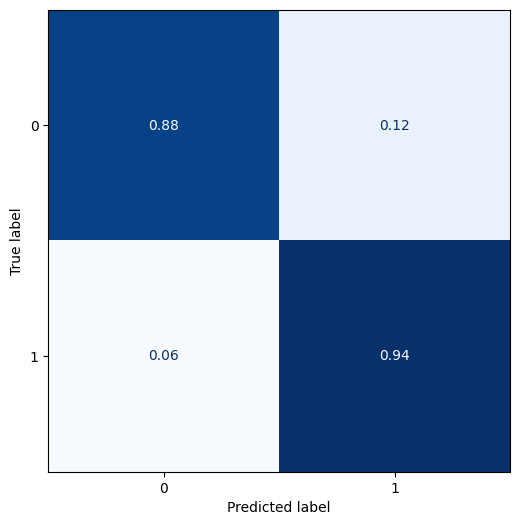

----------------------------------------
BNN [128, 64, 2] , fold_idx=2
Epoch 1/15
889/906 [============================>.] - ETA: 0s - loss: 0.8732 - accuracy: 0.8068
Epoch 1: val_accuracy improved from -inf to 0.86875, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold2
906/906 [==============================] - 3s 2ms/step - loss: 0.8708 - accuracy: 0.8081 - val_loss: 0.7576 - val_accuracy: 0.8688
Epoch 2/15
894/906 [============================>.] - ETA: 0s - loss: 0.7275 - accuracy: 0.8830
Epoch 2: val_accuracy improved from 0.86875 to 0.89130, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold2
906/906 [==============================] - 2s 2ms/step - loss: 0.7271 - accuracy: 0.8832 - val_loss: 0.7101 - val_accuracy: 0.8913
Epoch 3/15
904/906 [============================>.] - ETA: 0s - loss: 0.6980 - accuracy: 0.8979
Epoch 3: val_accuracy improved from 0.89130 to 0.90434, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold

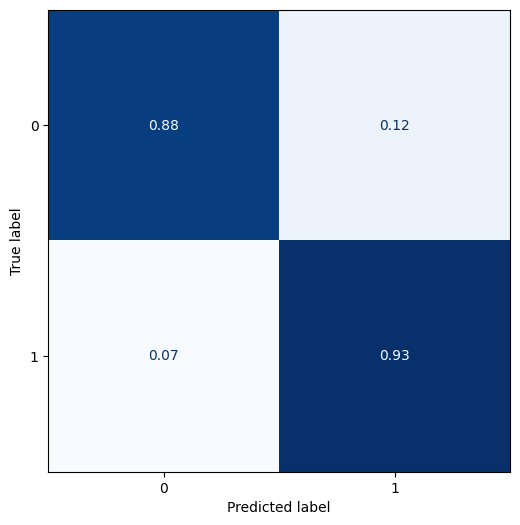

----------------------------------------
BNN [128, 64, 2] , fold_idx=3
Epoch 1/15
899/906 [============================>.] - ETA: 0s - loss: 0.8807 - accuracy: 0.8003
Epoch 1: val_accuracy improved from -inf to 0.86887, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold3
906/906 [==============================] - 2s 2ms/step - loss: 0.8796 - accuracy: 0.8009 - val_loss: 0.7571 - val_accuracy: 0.8689
Epoch 2/15
885/906 [============================>.] - ETA: 0s - loss: 0.7237 - accuracy: 0.8860
Epoch 2: val_accuracy improved from 0.86887 to 0.89448, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold3
906/906 [==============================] - 2s 2ms/step - loss: 0.7232 - accuracy: 0.8862 - val_loss: 0.7069 - val_accuracy: 0.8945
Epoch 3/15
904/906 [============================>.] - ETA: 0s - loss: 0.6977 - accuracy: 0.8992
Epoch 3: val_accuracy improved from 0.89448 to 0.89980, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold

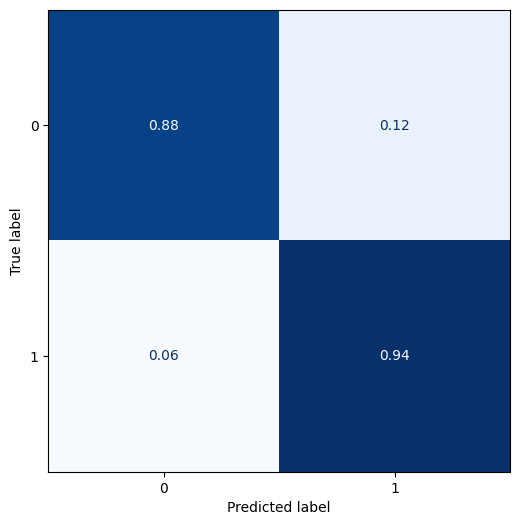

----------------------------------------
BNN [128, 64, 2] , fold_idx=4
Epoch 1/15
895/906 [============================>.] - ETA: 0s - loss: 0.8426 - accuracy: 0.8216
Epoch 1: val_accuracy improved from -inf to 0.87419, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold4
906/906 [==============================] - 2s 2ms/step - loss: 0.8412 - accuracy: 0.8223 - val_loss: 0.7379 - val_accuracy: 0.8742
Epoch 2/15
886/906 [============================>.] - ETA: 0s - loss: 0.7181 - accuracy: 0.8877
Epoch 2: val_accuracy improved from 0.87419 to 0.89126, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold4
906/906 [==============================] - 2s 2ms/step - loss: 0.7179 - accuracy: 0.8878 - val_loss: 0.7088 - val_accuracy: 0.8913
Epoch 3/15
881/906 [============================>.] - ETA: 0s - loss: 0.6987 - accuracy: 0.8978
Epoch 3: val_accuracy improved from 0.89126 to 0.90061, saving model to models/bnn__sec_StratifiedShuffleSplit__128_64_2__fold

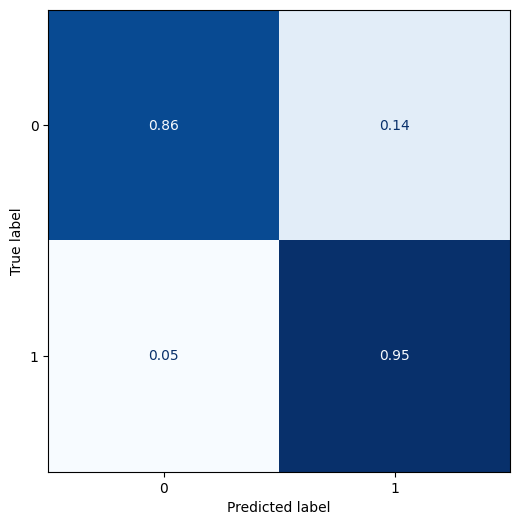

----------------------------------------


In [19]:
for neurons in bnn_models:
    label = 'bnn__%s' % ('_'.join(map(str, neurons)))
    accuracy_store_sec[label] = np.zeros(num_folds)
    precision_store_sec[label] = np.zeros(num_folds)
    recall_store_sec[label] = np.zeros(num_folds)
    tpr_store_sec[label] = np.zeros(num_folds)
    fpr_store_sec[label] = np.zeros(num_folds)
    fnr_store_sec[label] = np.zeros(num_folds)
    f1_store_sec[label] = np.zeros(num_folds)
    roc_auc_store_sec[label] = np.zeros(num_folds)
    
    fold_idx = 0
    for train_index, test_index in skf.split(X, Y):
        print('BNN', neurons ,', fold_idx=%d' % (fold_idx))
        X_train, X_test = X_bin[train_index], X_bin[test_index]
        y_train, y_test = Y_cat__2_classes[train_index], Y_cat__2_classes[test_index]
                        
        model = build_bnn_model(neurons, X_bin.shape[1])   
        fname = 'bnn__sec_StratifiedShuffleSplit__%s__fold%d' % ('_'.join(map(str, neurons)), fold_idx)
        
        model_checkpoint_callback = ModelCheckpoint(
            filepath='models/' + fname,
            monitor='val_accuracy',
            mode='max',
            save_weights_only=True,
            save_best_only=True,
            save_format="keras",
            verbose=1)
        
        if not os.path.isfile('models/' + fname):
            train_history = model.fit(X_train, y_train, 
                              batch_size=batch_size, 
                              epochs=train_epochs,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks=[model_checkpoint_callback])
                    
            # Reload best weights
            model.load_weights('models/' + fname)
        else:
            # Reload stored weights
            print('Loading models/' + fname)
            model.load_weights('models/' + fname)

        
        y_score = model.predict(X_test) # predict_classes was deprecated
        y_pred = np.argmax(y_score, axis=1)
        
        a, p, r, tpr, fpr, fnr, f1, roc_auc = metrics_binary_dataset(model, X_test, y_test, y_pred, y_score, is_bnn=True)
        accuracy_store_sec[label][fold_idx] = a
        precision_store_sec[label][fold_idx] = p
        recall_store_sec[label][fold_idx] = r
        tpr_store_sec[label][fold_idx] = tpr
        fpr_store_sec[label][fold_idx] = fpr
        fnr_store_sec[label][fold_idx] = fnr
        f1_store_sec[label][fold_idx] = f1
        roc_auc_store_sec[label][fold_idx] = roc_auc
        
        fold_idx += 1
        
        print('-'*40)
    
    print('='*80)

In [20]:
for store,metric in zip([accuracy_store_sec, precision_store_sec, recall_store_sec,
                         fnr_store_sec, fpr_store_sec, f1_store_sec, roc_auc_store_sec],
                        ['Accuracy', 'Precision', 'Recall', 'FNR', 'FPR', 'F1-score', 'ROC-AUC']):
    print('[%s]' % metric)
    for key in store:
        print('%s: %.1f ± %.1f' % (key, 100*store[key].mean(), 100*store[key].std()))
    print()

[Accuracy]
rf__depth_3__estimators_5: 87.3 ± 0.1
rf__depth_6__estimators_5: 90.3 ± 0.6
rf__depth_9__estimators_5: 92.8 ± 0.1
dt__depth_3: 88.1 ± 0.1
dt__depth_6: 90.4 ± 0.1
dt__depth_9: 92.4 ± 0.2
bnn__32_16_2: 91.0 ± 0.0
bnn__64_32_2: 91.5 ± 0.2
bnn__128_64_2: 91.9 ± 0.2

[Precision]
rf__depth_3__estimators_5: 83.4 ± 0.1
rf__depth_6__estimators_5: 88.7 ± 1.7
rf__depth_9__estimators_5: 94.4 ± 0.5
dt__depth_3: 85.3 ± 0.1
dt__depth_6: 96.4 ± 0.2
dt__depth_9: 95.0 ± 0.2
bnn__32_16_2: 91.6 ± 0.4
bnn__64_32_2: 92.1 ± 0.4
bnn__128_64_2: 93.0 ± 0.4

[Recall]
rf__depth_3__estimators_5: 99.9 ± 0.0
rf__depth_6__estimators_5: 97.3 ± 1.5
rf__depth_9__estimators_5: 94.3 ± 0.5
dt__depth_3: 98.2 ± 0.1
dt__depth_6: 88.2 ± 0.1
dt__depth_9: 93.0 ± 0.2
bnn__32_16_2: 94.7 ± 0.4
bnn__64_32_2: 94.9 ± 0.4
bnn__128_64_2: 94.4 ± 0.7

[FNR]
rf__depth_3__estimators_5: 0.1 ± 0.0
rf__depth_6__estimators_5: 2.7 ± 1.5
rf__depth_9__estimators_5: 5.7 ± 0.5
dt__depth_3: 1.8 ± 0.1
dt__depth_6: 11.8 ± 0.1
dt__depth_9: 7.